<a href="https://colab.research.google.com/github/Kiran-Pokhrel-91/Data/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

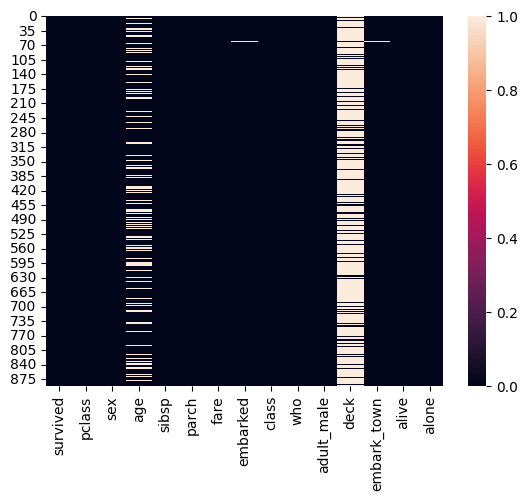

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df = (
    df.assign(
        age = df['age'].fillna(df['age'].mean()),
        embarked = df['embarked'].fillna(df['embarked'].mode()[0]),
        embark_town = df['embark_town'].fillna(df['embark_town'].mode()[0])
    )
)

In [ ]:
df.drop(columns='deck',inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Axes(0.125,0.11;0.775x0.77)


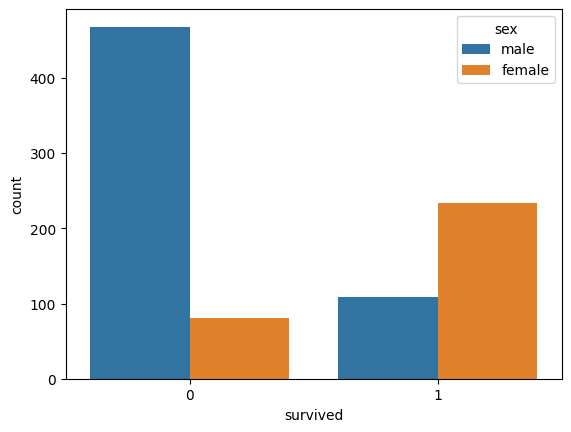

In [ ]:
print(sns.countplot(data=df,x='survived',hue='sex'))

<Axes: xlabel='survived', ylabel='age'>

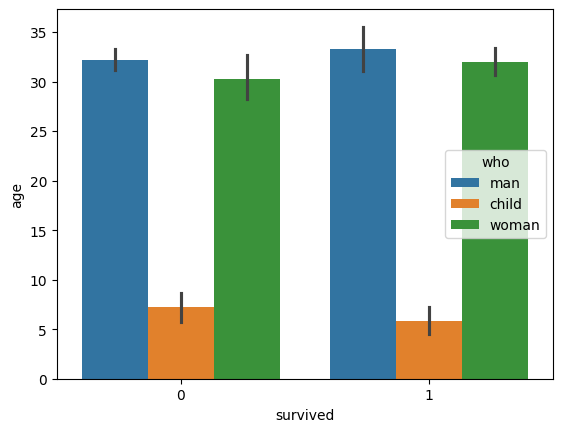

In [ ]:
sns.barplot(data=df,x='survived',y='age',hue='who')

<Axes: xlabel='age', ylabel='Count'>

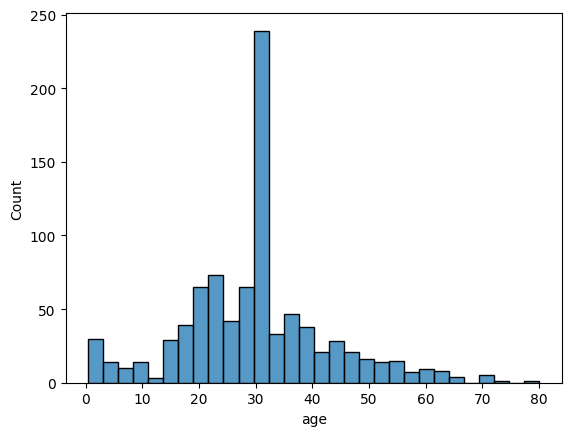

In [ ]:
sns.histplot(data=df,x='age')

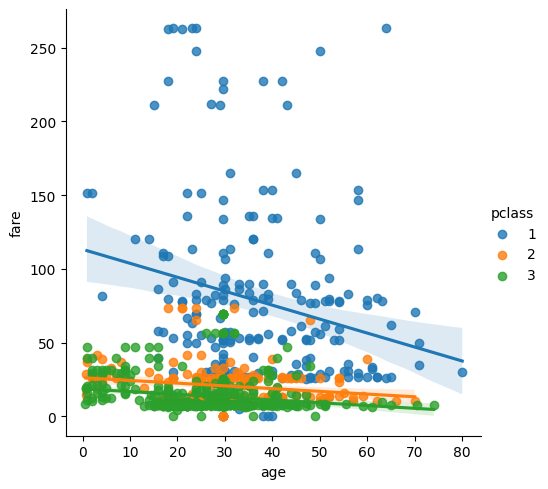

In [ ]:
sns.lmplot(data=df[df["fare"]<300],x='age',y='fare',hue='pclass')

In [ ]:
# groupinf
df['age_group']=pd.cut(df['age'],[0,10,18,30,50,80],labels=['child','teen','youth','adult','old'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youth
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youth
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult
